Import Initial Libraries


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Import the dataset and Perform Necessary Operations


In [2]:
data = pd.read_csv('twitter_training.csv', names=['ID', 'Topic', 'Sentiment', 'Tweet'])
data

,ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Topic      74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweet      73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [4]:
data.isnull().sum()

ID             0
Topic          0
Sentiment      0
Tweet        686
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

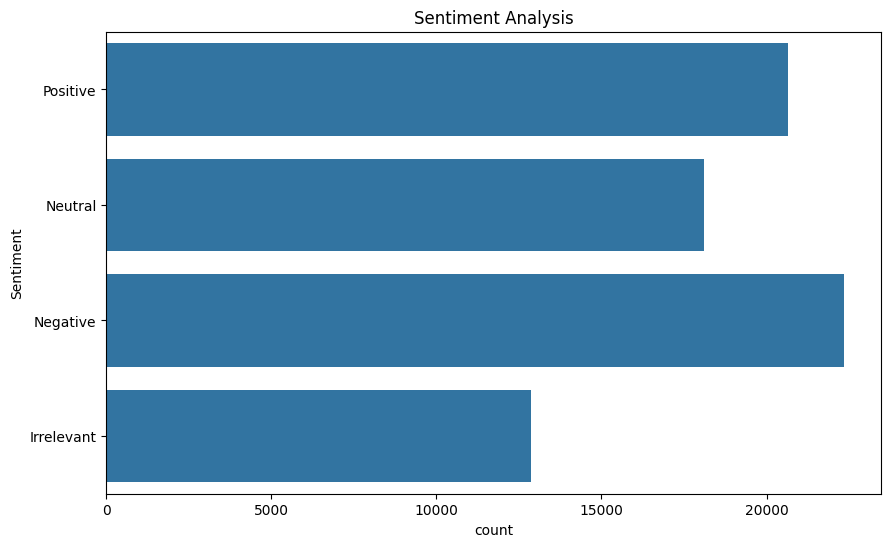

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data['Sentiment'])
plt.title('Sentiment Analysis')
plt.xlabel('count')
plt.ylabel('Sentiment')
plt.show()

RegEx Module

A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern. RegEx can be used to check if a string contains the specified search pattern.

In [8]:
import re
import string
EMOJI_PATTERN = re.compile(
    "["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "\U000024C2-\U0001F251" 
    "]+"
)

data['Tweet'] = data['Tweet'].str.replace(EMOJI_PATTERN, '', regex=True)

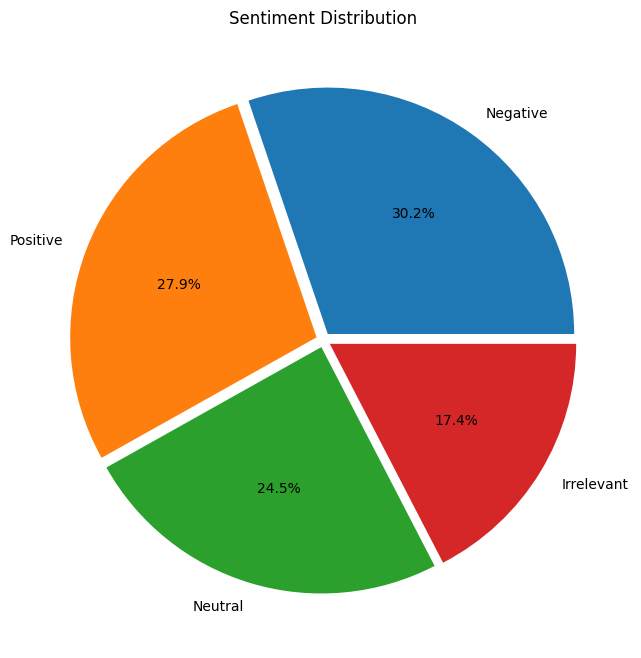

In [9]:
plt.figure(figsize=(10,8))
plt.pie(x=data['Sentiment'].value_counts().values, labels=data['Sentiment'].value_counts().index, autopct='%.1f%%', explode=[0.03, 0.03,0.03,0.03])
plt.title('Sentiment Distribution')
plt.show()

Natural Language Toolkit

NLTK is intended to support research and teaching in natural language processing (NLP) or closely related areas, including empirical linguistics, cognitive science, artificial intelligence, information retrieval, and machine learning.

In [10]:
import nltk
stemmer = nltk.SnowballStemmer("english")
nltk.download('stopwords')
from nltk.corpus import stopwords
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ishap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text


In [12]:
data["Tweet"] = data["Tweet"].apply(clean)

In [13]:
data

,ID,Topic,Sentiment,Tweet
0,2401,Borderlands,Positive,im get borderland murder
1,2401,Borderlands,Positive,come border kill
2,2401,Borderlands,Positive,im get borderland kill
3,2401,Borderlands,Positive,im come borderland murder
4,2401,Borderlands,Positive,im get borderland murder
...,...,...,...,...
74677,9200,Nvidia,Positive,realiz window partit mac like year behind nvi...
74678,9200,Nvidia,Positive,realiz mac window partit year behind nvidia d...
74679,9200,Nvidia,Positive,realiz window partit mac year behind nvidia d...
74680,9200,Nvidia,Positive,realiz window partit mac like year behind nvi...


WordCloud Module

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.

In [14]:
from wordcloud import WordCloud
#wc = WordCloud(width=800,height=500,min_font_size=10,background_color='white')
wc = WordCloud(stopwords = stopword, background_color = "white", colormap = "Dark2",
              max_font_size = 150, random_state = 42)

In [15]:
positive_data = data[data['Sentiment'] == 'Positive']['Tweet'].str.cat(sep=" ")
negative_data = data[data['Sentiment'] == 'Negative']['Tweet'].str.cat(sep=" ")
neutral_data = data[data['Sentiment'] == 'Neutral']['Tweet'].str.cat(sep=" ")
irrelevant_data = data[data['Sentiment'] == 'Irrelevant']['Tweet'].str.cat(sep=" ")

In [16]:
#Remove the word "game" as it is repeated in all types of sentiment 
positive_data = positive_data.replace("game", "")
negative_data = negative_data.replace("game", "")
neutral_data = neutral_data.replace("game", "")
irrelevant_data = irrelevant_data.replace("game", "")

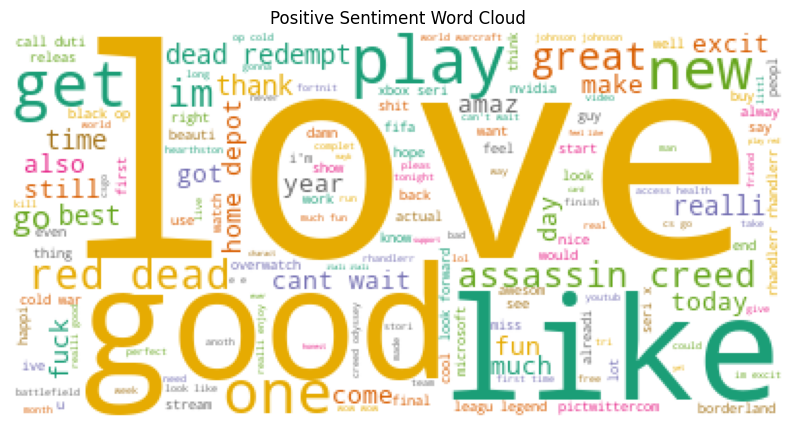

In [17]:
if positive_data:
    y=wc.generate(positive_data)
    plt.figure(figsize=(10,8))
    plt.title('Positive Sentiment Word Cloud')
    plt.imshow(y)
    plt.axis("off")
    plt.show()
else:
    print("No data available for positive sentiment.")

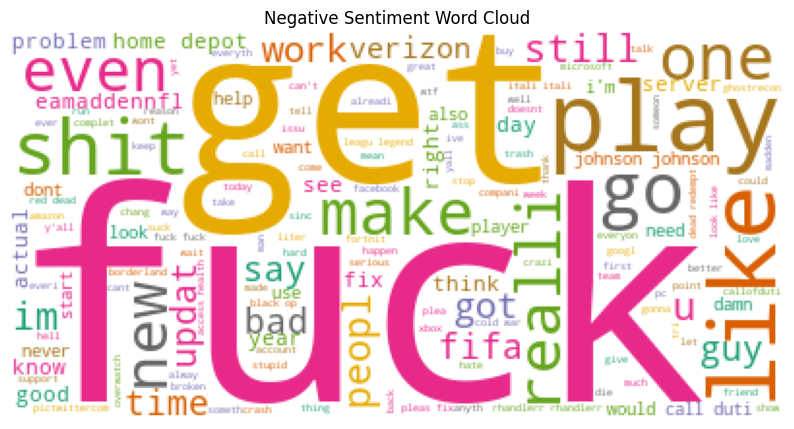

In [18]:
if negative_data:
    y=wc.generate(negative_data)
    plt.figure(figsize=(10,8))
    plt.title('Negative Sentiment Word Cloud')
    plt.imshow(y)
    plt.axis("off")
    plt.show()
else:
    print("No data available for negative sentiment.")

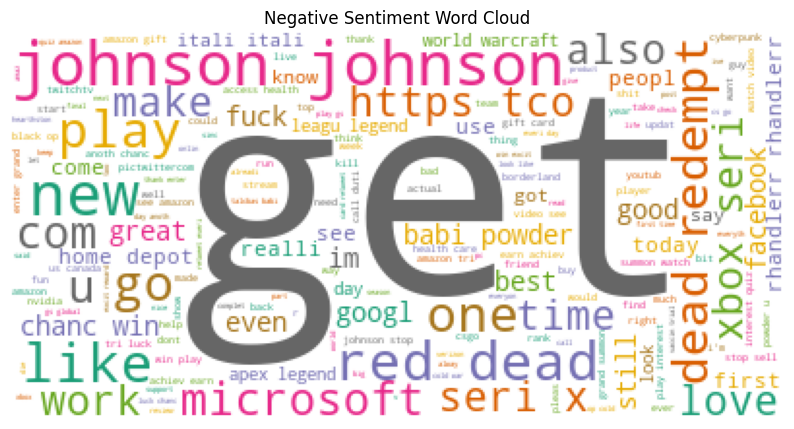

In [19]:
if neutral_data:
    y=wc.generate(neutral_data)
    plt.figure(figsize=(10,8))
    plt.title('Negative Sentiment Word Cloud')
    plt.imshow(y)
    plt.axis("off")
    plt.show()
else:
    print("No data available for neutral sentiment.")

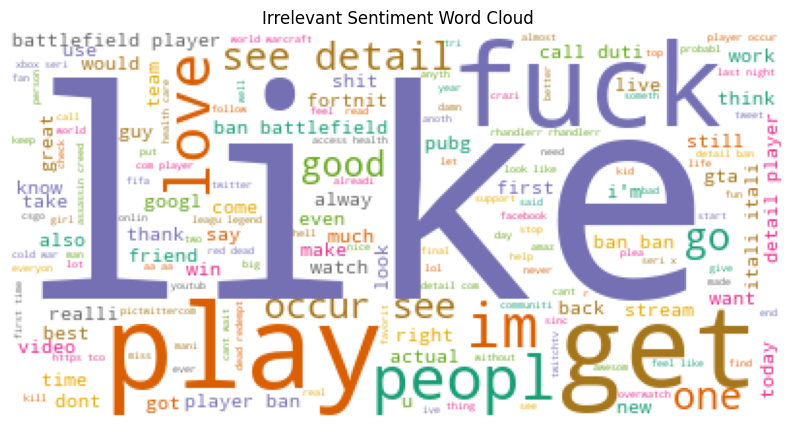

In [20]:
if irrelevant_data:
    y=wc.generate(irrelevant_data)
    plt.figure(figsize=(10,8))
    plt.title('Irrelevant Sentiment Word Cloud')
    plt.imshow(y)
    plt.axis("off")
    plt.show()
else:
    print("No data available for irrelevant sentiment.")

TextBlob Module

TextBlob is a Python (2 and 3) library for processing textual data. TextBlob can be used to perform a variety of NLP tasks ranging from parts-of-speech tagging to sentiment analysis, and language translation to text classification.

In [21]:
from textblob import TextBlob

In [22]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['Polarity'] = data['Tweet'].apply(pol)
data['Subjectivity'] = data['Tweet'].apply(sub)


In [23]:
data

,ID,Topic,Sentiment,Tweet,Polarity,Subjectivity
0,2401,Borderlands,Positive,im get borderland murder,0.0,0.00
1,2401,Borderlands,Positive,come border kill,0.0,0.00
2,2401,Borderlands,Positive,im get borderland kill,0.0,0.00
3,2401,Borderlands,Positive,im come borderland murder,0.0,0.00
4,2401,Borderlands,Positive,im get borderland murder,0.0,0.00
...,...,...,...,...,...,...
74677,9200,Nvidia,Positive,realiz window partit mac like year behind nvi...,-0.4,0.70
74678,9200,Nvidia,Positive,realiz mac window partit year behind nvidia d...,-0.4,0.70
74679,9200,Nvidia,Positive,realiz window partit mac year behind nvidia d...,-0.4,0.70
74680,9200,Nvidia,Positive,realiz window partit mac like year behind nvi...,-0.4,0.65


In [24]:
total_pol = data['Polarity'].groupby(data['Topic']).mean()
total_sub = data['Subjectivity'].groupby(data['Topic']).mean()

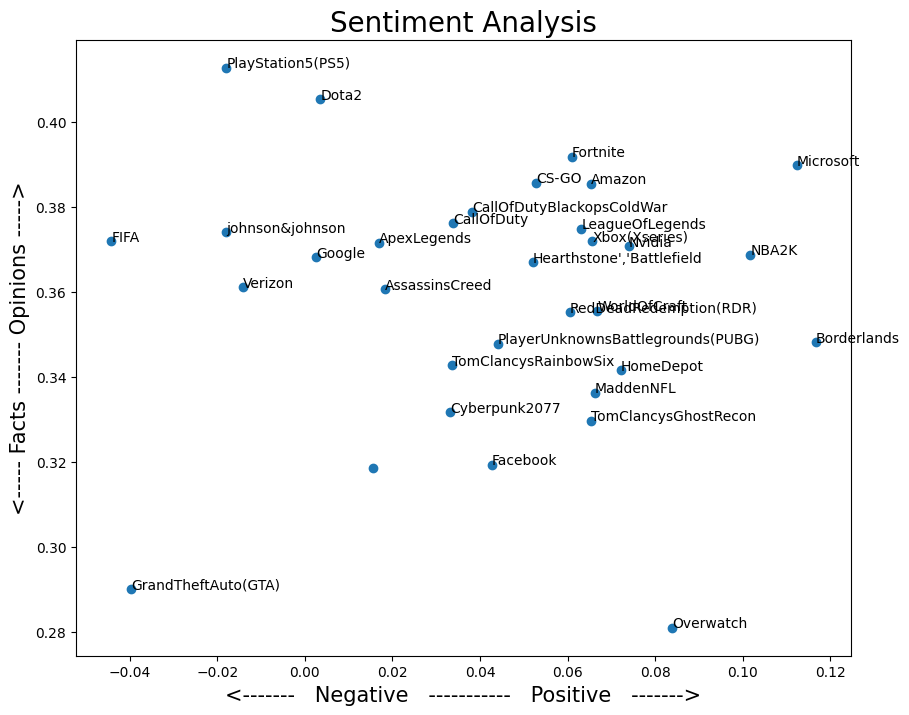

In [25]:
plt.rcParams['figure.figsize']=[10,8]
x = total_pol
y = total_sub
plt.scatter(x,y)
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-------   Negative   -----------   Positive   ------->', fontsize=15)
plt.ylabel('<----- Facts ------- Opinions ----->', fontsize=15)
topics = ["Borderlands","CallOfDutyBlackopsColdWar","Amazon","Overwatch","Xbox(Xseries)","NBA2K","Dota2","PlayStation5(PS5)","WorldOfCraft",
          "CS-GO","Google","AssassinsCreed","ApexLegends","LeagueOfLegends","Fortnite","Microsoft","Hearthstone','Battlefield","PlayerUnknownsBattlegrounds(PUBG)",
          "Verizon","HomeDepot","FIFA","RedDeadRedemption(RDR)","CallOfDuty","TomClancysRainbowSix","Facebook","GrandTheftAuto(GTA)","MaddenNFL",
          "johnson&johnson","Cyberpunk2077","TomClancysGhostRecon","Nvidia"]
for i, label in enumerate(topics):
    plt.annotate(label, (x[i], y[i]))
plt.show()